In [1]:
import sys
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *
plt.style.use('Style.mplstyle')
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None  # suppress warnings

In [2]:
path = 'O:/Nat_Chem-Aerosol-data/Data/Raw_Data/2025/SMPSxSASS/'
parentpath = '../../../../../../'

SMPS = import_SMPS(path, parentpath, 0)
SASS = import_SASS(path, parentpath, -8, -54, 3)

bin_labels = SMPS['2025-08-05_093558_SMPS_Number'].keys()[42:-1]

bin_Dp = [7.04]
for label in bin_labels:
    bin_Dp.append(float(label))

timestamps = ['2025-08-05 09:48:21', '2025-08-06 08:44:39']

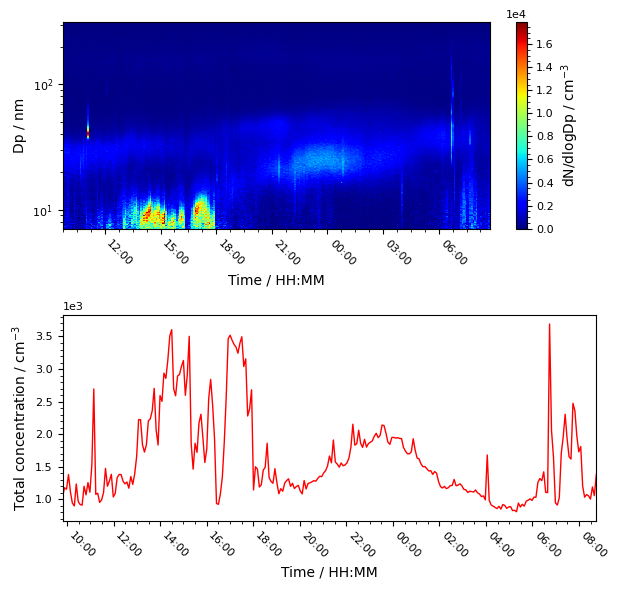

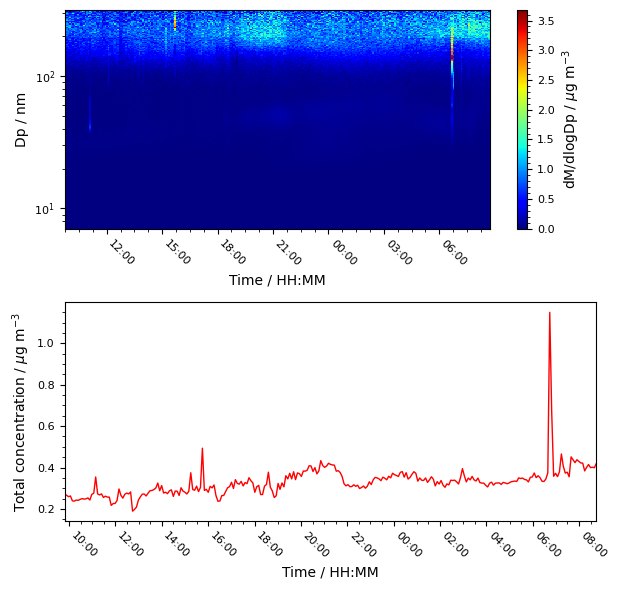

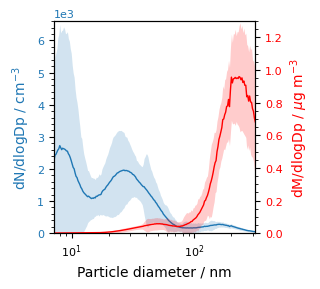

In [3]:
fig1, ax1 = plt.subplots(2,1, figsize = (6.3, 6))
plot_timeseries(fig1, ax1, SMPS['2025-08-05_093558_SMPS_Number'], bin_labels, bin_Dp, 'number', timestamps, True, SMPS['2025-08-05_093558_SMPS_Number'].keys()[38], None, False)
fig1.tight_layout()
fig1.savefig('SMPS_SASS/SMPS_timeseries_number.jpg', dpi = 600)

fig2, ax2 = plt.subplots(2,1, figsize = (6.3, 6))
plot_timeseries(fig2, ax2, SMPS['2025-08-05_093558_SMPS_Mass'], bin_labels, bin_Dp, 'mass', timestamps, True, SMPS['2025-08-05_093558_SMPS_Mass'].keys()[38], None, False)
fig2.tight_layout()
fig2.savefig('SMPS_SASS/SMPS_timeseries_mass.jpg', dpi = 600)

fig3, ax3 = plt.subplots(figsize = (3.3, 3))
mean_number, mean_mass, ax3, ax3_2 = plot_bin_mean(ax3, timestamps, SMPS['2025-08-05_093558_SMPS_Number'], SMPS['2025-08-05_093558_SMPS_Mass'], bin_labels, 'Time', bin_Dp[1:], None, None, True)
ax3.set(ylim = (0, 6600))
ax3_2.set_ylim(0, 1.3)
fig3.tight_layout()
fig3.savefig('SMPS_SASS/SMPS_SizeDist.jpg', dpi = 600)

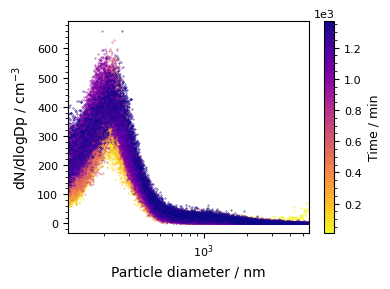

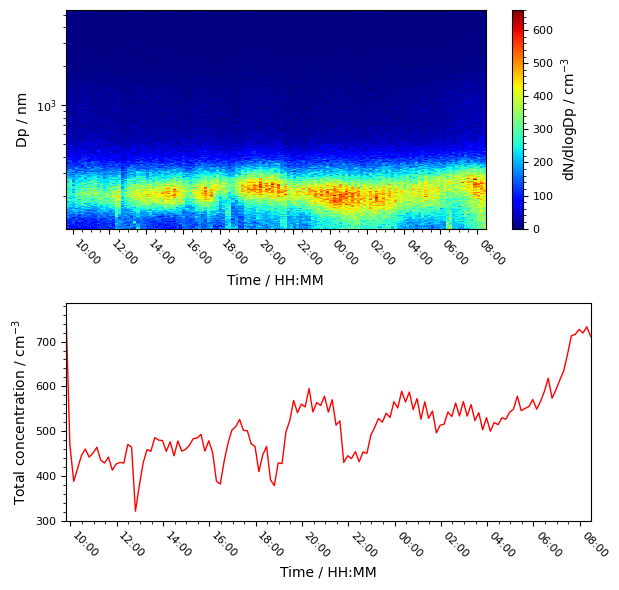

In [4]:
fig4, ax4 = plt.subplots(figsize = (4, 3))
plot_running_sizedist(fig4, ax4, SASS['2025-08-05'], None, None, ['Particle diameter / nm', 'dN/dlogDp / cm$^{-3}$'], 10, True)
fig4.tight_layout()
fig4.savefig('SMPS_SASS/SASS_SizeDist.jpg', dpi = 600)

SASS_keys = ['CorrectedSpectralDensity', 'Size', 'ScanNumber']
fig5, ax5 = plt.subplots(2, 1, figsize = (6.3, 6))
plot_timeseries(fig5, ax5, SASS['2025-08-05'], SASS_keys, None, 'number', timestamps, True, SASS_keys[0], None, True)
fig5.tight_layout()
fig5.savefig('SMPS_SASS/SASS_timeseries_number.jpg', dpi = 600)

f(x) = 1.0683970448973656x + 25.31443862290568, R2 = 0.5431533305046017
f(x) = 1.068404617666461x + 25.31291385702225, R2 = 0.5431580735584152


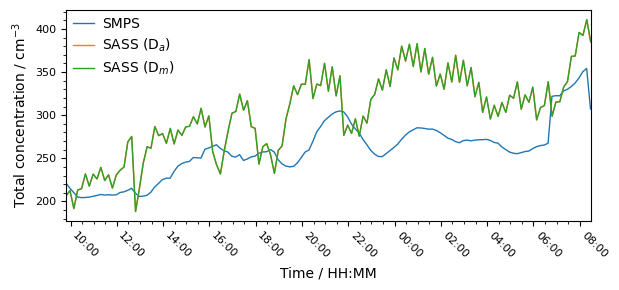

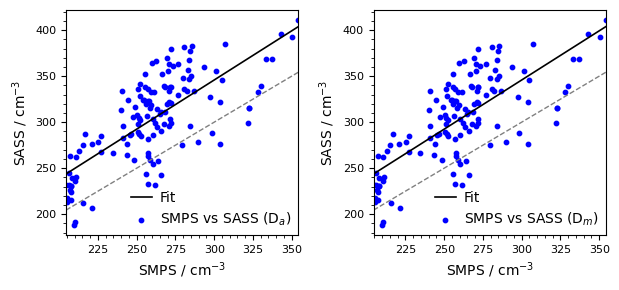

In [5]:
running_SMPS = {}
for key in SMPS.keys():
    new_key = key.split('_')[3]
    temp = running_mean(SMPS[key], bin_labels, 'Time', '10T', 10, ['2025-08-05 09:47', '2025-08-06 08:29'])
    temp['Time'] = temp.index
    running_SMPS[new_key] = temp.reset_index(drop = True)

Total = {}
Total['SMPS'] = calc_total_conc(running_SMPS['Number'], bin_labels[153:], 128, None)
Total['SMPS']['Time'] = pd.to_datetime(Total['SMPS']['Time']) + pd.Timedelta(minutes = 8)
Total['SASS_Da'] = calc_total_conc(SASS['2025-08-05'], [112, 314], 202.5, ['Size', 'CorrectedSpectralDensity'])
Total['SASS_Dm'] = calc_total_conc(SASS['2025-08-05'], [112, 314], 202.5, ['MobilitySize', 'CorrMobilitySpectralDensity'])

fig6, ax6 = plt.subplots(figsize = (6.3, 3))
for key in Total.keys():
    plot_total(ax6, Total[key], 'Total Concentration', None, False)
ax6.legend(['SMPS', 'SASS (D$_{a}$)', 'SASS (D$_{m}$)'])
ax6.set(ylabel = 'Total concentration / cm$^{-3}$')
fig6.tight_layout()

merged = pd.DataFrame()
for key in Total.keys():
    merged = pd.merge(merged, Total[key], left_index = True, right_index = True, how = 'outer')

fig7, ax7 = plt.subplots(1, 2, figsize = (6.3, 3))
ax_labels = ['SMPS / cm$^{-3}$', 'SASS / cm$^{-3}$']
instrument_comparison(ax7[0], merged['Total Concentration_x'], merged['Total Concentration_y'], 'SMPS vs SASS (D$_{a}$)', ax_labels, False)
instrument_comparison(ax7[1], merged['Total Concentration_x'], merged['Total Concentration'], 'SMPS vs SASS (D$_{m}$)', ax_labels, False)
fig7.tight_layout()
fig7.savefig('SMPS_SASS/SMPSvsSASS.jpg', dpi = 600)